In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/GUNGUN PANDEY/OneDrive/Desktop/Datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
len(df)

7043

In [4]:
#Initial data preparation

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [8]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
string_col = list(df.dtypes[df.dtypes == 'object'].index)

In [9]:
for col in string_col:
    df[col] = df[col].str.lower().str.replace(" ","_")

In [10]:
df.churn = (df.churn == 'yes').astype(int)

In [11]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [12]:
#setting up the Validation framework

from sklearn.model_selection import train_test_split

In [13]:
df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 1)

In [14]:
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 1)

In [15]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [16]:
df_train = df_train.reset_index(drop = True)
df_val = df_train.reset_index(drop = True)
df_test = df_train.reset_index(drop = True)

In [17]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [18]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

In [19]:
#EDA

df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [20]:
df_full_train.churn.value_counts(normalize = True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [21]:
global_churn = df_full_train.churn.mean()
round(global_churn, 3)

0.27

In [22]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [23]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [24]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

In [25]:
#Feature importance: Churn rate and risk ratio

female_churn = df_full_train[df_full_train.gender == 'female'].churn.mean()
print('gender == female: ', round(female_churn, 3))

male_churn = df_full_train[df_full_train.gender == 'male'].churn.mean()
print('gender == male: ', round(male_churn, 3))

gender == female:  0.277
gender == male:  0.263


In [26]:
#risk ratio

female_churn / global_churn

1.0253955354648652

In [27]:
male_churn / global_churn

0.9749802969838747

In [28]:
partner_yes = df_full_train[df_full_train.partner == 'yes'].churn.mean()
print('partner == yes: ', round(partner_yes, 3))

partner_no = df_full_train[df_full_train.partner == 'no'].churn.mean()
print('partner == no: ', round(partner_no, 3))

partner == yes:  0.205
partner == no:  0.33


In [29]:
partner_yes / global_churn

0.7594724924338315

In [30]:
partner_no / global_churn

1.2216593879412643

In [31]:
from IPython.display import display

for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    display(df_group)
    print()
    print()

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


In [32]:
#Feature importance: Mutual information

from sklearn.metrics import mutual_info_score

In [33]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [34]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending = False).to_frame(name = 'MI')

,MI
contract,0.098320
onlinesecurity,0.063085
techsupport,0.061032
internetservice,0.055868
onlinebackup,0.046923
deviceprotection,0.043453
paymentmethod,0.043210
streamingtv,0.031853
streamingmovies,0.031581
paperlessbilling,0.017589


In [35]:
#Feature importance: Correlation

df_full_train[numerical].corrwith(df_full_train.churn).to_frame('correlation')

,correlation
tenure,-0.351885
monthlycharges,0.196805
totalcharges,-0.196353


In [36]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)].churn.mean()

0.3994413407821229

In [37]:
df_full_train[(df_full_train.tenure > 12)].churn.mean()

0.17634908339788277

In [38]:
df_full_train.groupby('churn')[numerical].mean()

,tenure,monthlycharges,totalcharges
churn,,,
0,37.531972,61.176477,2548.021627
1,18.070348,74.521203,1545.689415


In [39]:
# One-hot Encoding

from sklearn.feature_extraction import DictVectorizer

In [40]:
train_dict = df_train[categorical + numerical].to_dict(orient = 'records')
train_dict[1]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 10,
 'monthlycharges': 95.25,
 'totalcharges': 1021.55}

In [41]:
dv = DictVectorizer(sparse = False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [169]:
import pickle
with open('dv.pkl', 'wb') as f:
    pickle.dump(dv, f)

In [42]:
X_train = dv.transform(train_dict)
X_train.shape

(4225, 45)

In [43]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [44]:
val_dict = df_val[categorical + numerical].to_dict(orient = 'records')
val_dict[1]

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 10,
 'monthlycharges': 95.25,
 'totalcharges': 1021.55}

In [45]:
dv = DictVectorizer(sparse = False)
dv.fit(val_dict)

X_val = dv.transform(val_dict)
X_val.shape

(4225, 45)

In [46]:
#Logistic Regression

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [47]:
z = np.linspace(-7, 7 ,51)

In [48]:
sigmoid(z)

array([9.11051194e-04, 1.20508423e-03, 1.59386223e-03, 2.10780106e-03,
       2.78699622e-03, 3.68423990e-03, 4.86893124e-03, 6.43210847e-03,
       8.49286285e-03, 1.12064063e-02, 1.47740317e-02, 1.94550846e-02,
       2.55807883e-02, 3.35692233e-02, 4.39398154e-02, 5.73241759e-02,
       7.44679452e-02, 9.62155417e-02, 1.23467048e-01, 1.57095469e-01,
       1.97816111e-01, 2.46011284e-01, 3.01534784e-01, 3.63547460e-01,
       4.30453776e-01, 5.00000000e-01, 5.69546224e-01, 6.36452540e-01,
       6.98465216e-01, 7.53988716e-01, 8.02183889e-01, 8.42904531e-01,
       8.76532952e-01, 9.03784458e-01, 9.25532055e-01, 9.42675824e-01,
       9.56060185e-01, 9.66430777e-01, 9.74419212e-01, 9.80544915e-01,
       9.85225968e-01, 9.88793594e-01, 9.91507137e-01, 9.93567892e-01,
       9.95131069e-01, 9.96315760e-01, 9.97213004e-01, 9.97892199e-01,
       9.98406138e-01, 9.98794916e-01, 9.99088949e-01])

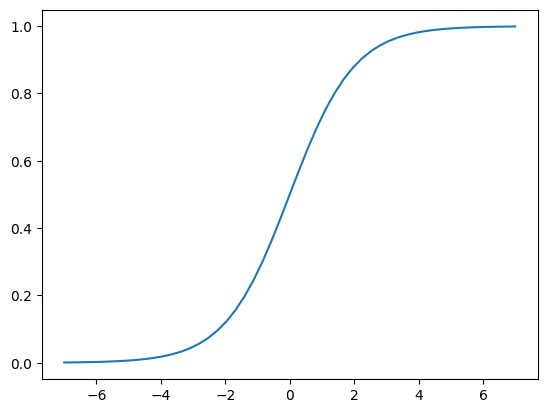

In [49]:
plt.plot(z, sigmoid(z))

In [50]:
def linear_regression(xi):
    result = w0
    
    for j in range(len(w)):
        result = result + xi[j] * w[j]
        
    return result

In [51]:
def logistic_regression(xi):
    score = w0
    
    for j in range(len(w)):
        score = score + xi[j] * w[j]
    
    result = sigmoid(score)
    return result

In [52]:
#Training Logistic Regression

from sklearn.linear_model import LogisticRegression

In [53]:
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [54]:
model.intercept_[0]

-0.12193427062751563

In [55]:
model.coef_[0].round(3)

array([ 0.607, -0.058, -0.671, -0.028, -0.094,  0.052, -0.103, -0.071,
       -0.042, -0.08 , -0.376,  0.357, -0.103,  0.002, -0.248,  0.133,
       -0.008,  0.057, -0.103, -0.076,  0.217, -0.103, -0.236, -0.249,
        0.127, -0.116, -0.006, -0.101, -0.049,  0.067, -0.04 ,  0.133,
       -0.255,  0.199, -0.101, -0.103,  0.082, -0.064, -0.103,  0.045,
        0.17 , -0.103, -0.189, -0.067,  0.   ])

In [56]:
y_pred = model.predict_proba(X_train)[:, 1]

churn_decision = (y_pred >= 0.5)

In [57]:
(y_val == churn_decision).mean()

0.8061538461538461

In [58]:
df_pred = pd.DataFrame()
df_pred['probabil'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [59]:
df_pred['correct'] = df_pred.prediction == df_pred.actual
df_pred

,probabil,prediction,actual,correct
0,0.078465,0,0,True
1,0.678458,1,0,False
2,0.631899,1,1,True
3,0.694484,1,0,False
4,0.032398,0,0,True
...,...,...,...,...
4220,0.120340,0,0,True
4221,0.316022,0,0,True
4222,0.510155,1,1,True
4223,0.027668,0,0,True


In [60]:
df_pred.correct.mean()

0.8061538461538461

In [61]:
#Model interpretation

model.intercept_[0]

-0.12193427062751563

In [62]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.607,
 'contract=one_year': -0.058,
 'contract=two_year': -0.671,
 'dependents=no': -0.028,
 'dependents=yes': -0.094,
 'deviceprotection=no': 0.052,
 'deviceprotection=no_internet_service': -0.103,
 'deviceprotection=yes': -0.071,
 'gender=female': -0.042,
 'gender=male': -0.08,
 'internetservice=dsl': -0.376,
 'internetservice=fiber_optic': 0.357,
 'internetservice=no': -0.103,
 'monthlycharges': 0.002,
 'multiplelines=no': -0.248,
 'multiplelines=no_phone_service': 0.133,
 'multiplelines=yes': -0.008,
 'onlinebackup=no': 0.057,
 'onlinebackup=no_internet_service': -0.103,
 'onlinebackup=yes': -0.076,
 'onlinesecurity=no': 0.217,
 'onlinesecurity=no_internet_service': -0.103,
 'onlinesecurity=yes': -0.236,
 'paperlessbilling=no': -0.249,
 'paperlessbilling=yes': 0.127,
 'partner=no': -0.116,
 'partner=yes': -0.006,
 'paymentmethod=bank_transfer_(automatic)': -0.101,
 'paymentmethod=credit_card_(automatic)': -0.049,
 'paymentmethod=electronic_check': 0.067

In [63]:
small = ['contract', 'tenure', 'monthlycharges']

In [64]:
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [65]:
dict_train_small = df_train[small].to_dict(orient = 'records')
dict_val_small = df_val[small].to_dict(orient = 'records')

In [66]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dict_train_small)

DictVectorizer(sparse=False)

In [67]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [68]:
X_train_small = dv_small.transform(dict_train_small)

In [69]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [70]:
w0 = model_small.intercept_[0]
w0

-2.477957595665347

In [71]:
w0 = model_small.coef_[0]
w0

array([ 0.9711394 , -0.02379507, -0.94828863,  0.02748534, -0.03619005])

In [72]:
w = model_small.coef_[0].round(2)
w

array([ 0.97, -0.02, -0.95,  0.03, -0.04])

In [73]:
dict(zip(dv_small.get_feature_names_out(), w))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.02,
 'contract=two_year': -0.95,
 'monthlycharges': 0.03,
 'tenure': -0.04}

In [74]:
-2.47 + 0.97 + 50 * 0.027 + 5 * (-0.036)

-0.3300000000000001

In [75]:
sigmoid(_)

0.41824062315816374

In [76]:
#Using the model

dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')

In [77]:
dv = DictVectorizer(sparse = False)
X_full_train = dv.fit_transform(dicts_full_train)

In [78]:
y_full_train = df_full_train.churn.values

In [79]:
model = LogisticRegression(solver='liblinear', max_iter=1000)
model.fit(X_full_train, y_full_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [80]:
 dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')

In [81]:
X_test = dv.transform(dicts_test)

In [82]:
y_pred = model.predict_proba(X_test)[:, 1]

In [83]:
churn_decision = (y_pred >= 0.5)
(churn_decision == y_test).mean()

0.8033136094674557

In [84]:
customer = dicts_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 1,
 'partner': 'no',
 'dependents': 'no',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 9,
 'monthlycharges': 80.85,
 'totalcharges': 751.65}

In [85]:
X_small = dv.transform([customer])

In [86]:
model.predict_proba(X_small)[0, 1]

0.7258934602334478

In [87]:
y_test[-1]

1

In [88]:
#Accuracy and dummy model

from sklearn.metrics import accuracy_score

In [89]:
accuracy_score(y_val, churn_decision)

0.8033136094674557

In [90]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.269
0.05 0.503
0.10 0.599
0.15 0.656
0.20 0.700
0.25 0.737
0.30 0.762
0.35 0.780
0.40 0.788
0.45 0.803
0.50 0.803
0.55 0.802
0.60 0.791
0.65 0.784
0.70 0.771
0.75 0.750
0.80 0.734
0.85 0.732
0.90 0.731
0.95 0.731
1.00 0.731


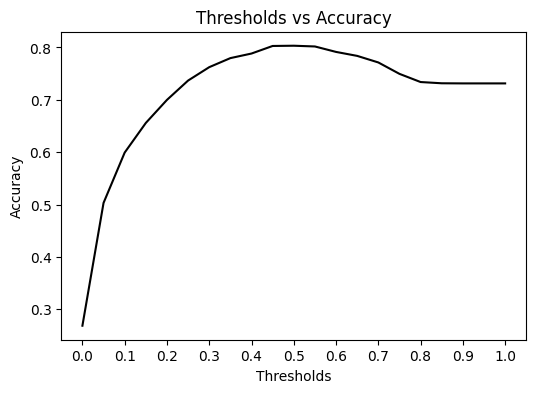

In [91]:
plt.figure(figsize = (6,4))

plt.plot(thresholds, scores, color = 'black')

plt.title('Thresholds vs Accuracy')
plt.xlabel('Thresholds')
plt.ylabel('Accuracy')

plt.xticks(np.linspace(0, 1, 11))

plt.show()

In [92]:
from collections import Counter

In [93]:
Counter(y_pred >= 1.0)

Counter({False: 4225})

In [94]:
1 - y_val.mean()

0.7313609467455622

In [95]:
accuracy_score(y_val, churn_decision)

0.8033136094674557

In [96]:
size_val = len(y_val)
baseline = np.repeat(False, size_val)
baseline

array([False, False, False, ..., False, False, False])

In [97]:
accuracy_score(baseline, y_val)

0.7313609467455622

In [98]:
#Confusion table

actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [99]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred <= t)

In [100]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()
tp,tn

(635, 2759)

In [101]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()
fp,fn

(331, 500)

In [102]:
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[2759,  331],
       [ 500,  635]])

In [103]:
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.08],
       [0.12, 0.15]])

In [104]:
#Precision and Recall 
(tp + tn) / (tp + tn + fp + fn)

0.8033136094674557

In [105]:
precision = tp / (tp + fp) #identified non-churning people as churning
precision

0.6573498964803313

In [106]:
recall = tp / (tp + fn) #failed to identify churning people
recall

0.5594713656387665

In [107]:
#ROC and AUC

#True Positive Rate and False Positive Rate
tpr = tp / (tp + fn)
tpr

0.5594713656387665

In [108]:
fpr = fp / (tn + fp)
fpr

0.10711974110032363

In [109]:
thresholds = np.linspace(0, 1, 101)

In [110]:
scores = []

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred <= t)
    
    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [111]:
columns = ['thresholds','tp','fp','fn','tn']
df_scores = pd.DataFrame(scores, columns = columns)

In [112]:
df_scores[::10]

,thresholds,tp,fp,fn,tn
0,0.0,1135,3090,0,0
10,0.1,1069,1627,66,1463
20,0.2,983,1116,152,1974
30,0.3,866,735,269,2355
40,0.4,754,513,381,2577
50,0.5,635,331,500,2759
60,0.6,444,190,691,2900
70,0.7,232,63,903,3027
80,0.8,14,3,1121,3087
90,0.9,0,0,1135,3090


In [113]:
df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
df_scores[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,1135,3090,0,0,1.000000,1.000000
10,0.1,1069,1627,66,1463,0.941850,0.526537
20,0.2,983,1116,152,1974,0.866079,0.361165
30,0.3,866,735,269,2355,0.762996,0.237864
40,0.4,754,513,381,2577,0.664317,0.166019
50,0.5,635,331,500,2759,0.559471,0.107120
60,0.6,444,190,691,2900,0.391189,0.061489
70,0.7,232,63,903,3027,0.204405,0.020388
80,0.8,14,3,1121,3087,0.012335,0.000971
90,0.9,0,0,1135,3090,0.000000,0.000000


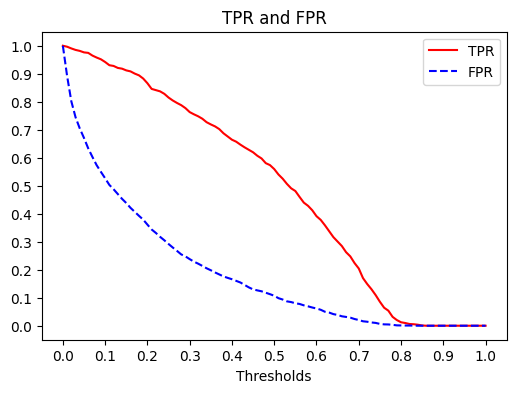

In [114]:
plt.figure(figsize = (6,4))

plt.plot(df_scores.thresholds, df_scores.tpr, color = 'red', linestyle = 'solid', label = 'TPR')
plt.plot(df_scores.thresholds, df_scores.fpr, color = 'blue', linestyle = 'dashed', label = 'FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

plt.show()

In [115]:
#Random model

np.random.seed(1)
y_rand = np.random.uniform(0, 1, size = len(y_val))

In [116]:
((y_rand >= 0.5) == y_val).mean()

0.4911242603550296

In [117]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []
    
    thresholds = np.linspace(0, 1, 101)
    

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred <= t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))
    
    columns = ['thresholds','tp','fp','fn','tn']
    df_scores = pd.DataFrame(scores, columns = columns)
    
    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [118]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

In [119]:
df_rand[::10]

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.0,1135,3090,0,0,1.000000,1.000000
10,0.1,1026,2783,109,307,0.903965,0.900647
20,0.2,916,2474,219,616,0.807048,0.800647
30,0.3,791,2152,344,938,0.696916,0.696440
40,0.4,679,1851,456,1239,0.598238,0.599029
50,0.5,559,1574,576,1516,0.492511,0.509385
60,0.6,459,1241,676,1849,0.404405,0.401618
70,0.7,326,936,809,2154,0.287225,0.302913
80,0.8,220,622,915,2468,0.193833,0.201294
90,0.9,103,306,1032,2784,0.090749,0.099029


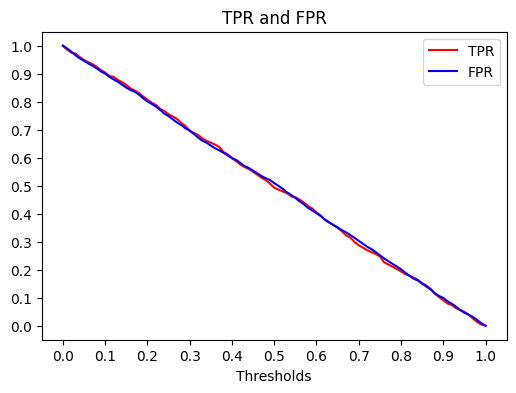

In [120]:
plt.figure(figsize = (6,4))

plt.plot(df_rand.thresholds, df_rand['tpr'], color = 'red', linestyle = 'solid', label = 'TPR')
plt.plot(df_rand.thresholds, df_rand['fpr'], color = 'blue', linestyle = 'solid', label = 'FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

plt.show()

In [121]:
#Ideal model

num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(3090, 1135)

In [122]:
y_ideal = np.repeat([0,1], [num_neg, num_pos])
y_ideal

array([0, 0, 0, ..., 1, 1, 1])

In [123]:
y_ideal_pred = np.linspace(0, 1, len(y_val))

In [124]:
1 - y_val.mean()

0.7313609467455622

In [125]:
((y_ideal_pred >= 0.731) == y_ideal).mean()

0.9995266272189349

In [126]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal

,thresholds,tp,fp,fn,tn,tpr,fpr
0,0.00,1135,3090,0,1,1.000000,0.999676
1,0.01,1135,3047,0,43,1.000000,0.986084
2,0.02,1135,3005,0,85,1.000000,0.972492
3,0.03,1135,2963,0,127,1.000000,0.958900
4,0.04,1135,2921,0,169,1.000000,0.945307
...,...,...,...,...,...,...,...
96,0.96,169,0,966,3090,0.148899,0.000000
97,0.97,127,0,1008,3090,0.111894,0.000000
98,0.98,85,0,1050,3090,0.074890,0.000000
99,0.99,43,0,1092,3090,0.037885,0.000000


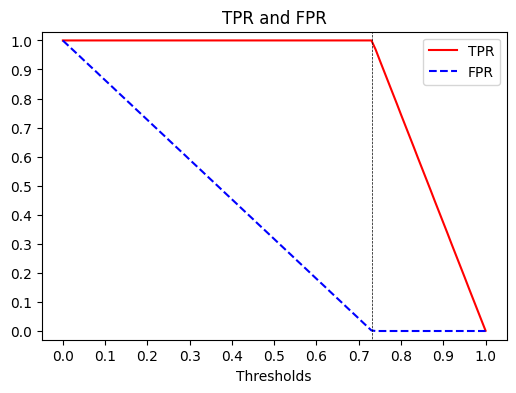

In [127]:
plt.figure(figsize = (6,4))

plt.plot(df_ideal.thresholds, df_ideal['tpr'], color = 'red', linestyle = 'solid', label = 'TPR')
plt.plot(df_ideal.thresholds, df_ideal['fpr'], color = 'blue', linestyle = 'dashed', label = 'FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.vlines(1 - y_val.mean(), -1, 2, linewidth=0.5, linestyle='dashed', color='black')
plt.ylim(-0.03, 1.03)

plt.xlabel('Thresholds')
plt.title('TPR and FPR')

plt.show()

Text(0.5, 1.0, 'ROC curve')

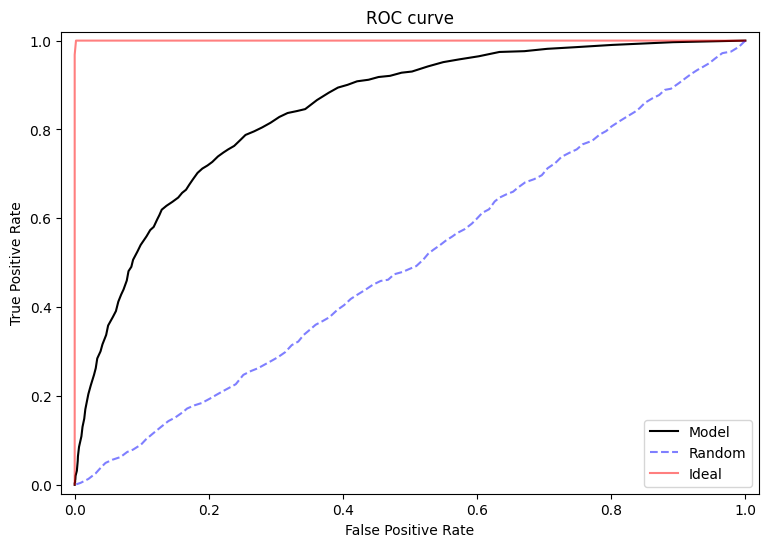

In [128]:
#Receiver Operating Characteristic(ROC) Curve

plt.figure(figsize = (9,6))

plt.plot(df_scores.fpr, df_scores.tpr, color = "black", label = "Model")
plt.plot(df_rand.fpr, df_rand.tpr, color = "blue", linestyle = "dashed", alpha = 0.5, label = "Random")
plt.plot(df_ideal.fpr, df_ideal.tpr, color = "red", linestyle = "solid", alpha = 0.5, label = "Ideal")

plt.legend()

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

Text(0.5, 1.0, 'ROC curve')

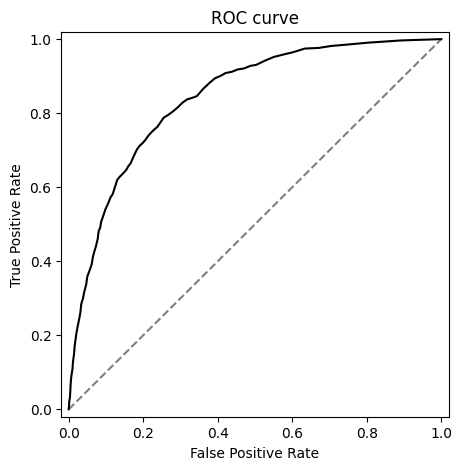

In [129]:
plt.figure(figsize = (5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, color = 'black')
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed', alpha = 0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

In [130]:
#Using Scikit-Learn for plotting the ROC curve

from sklearn.metrics import roc_curve

In [131]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

Text(0.5, 1.0, 'ROC curve')

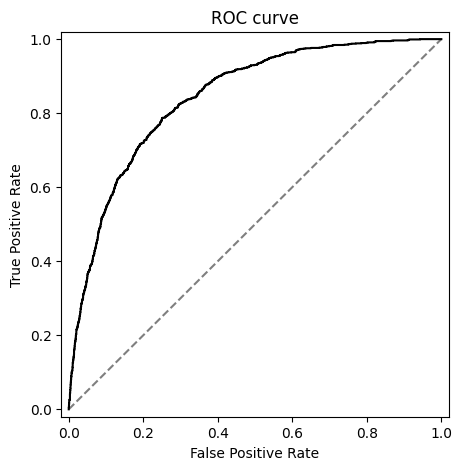

In [132]:
plt.figure(figsize = (5, 5))

plt.plot(fpr, tpr, color = 'black', label = "Model")
plt.plot([0, 1], [0, 1], color = 'black', linestyle = 'dashed', alpha = 0.5, label = "Random")

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

In [133]:
#ROC AUC(Area under the ROC curve)

from sklearn.metrics import auc

In [134]:
auc(fpr, tpr)

0.8430638837802774

In [135]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

0.8430638837802774

In [136]:
from sklearn.metrics import roc_auc_score

In [137]:
roc_auc_score(y_val, y_pred)

0.8430638837802774

In [138]:
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [139]:
import random

In [140]:
n = 100000

success = 0

for i in range(n):
    pos_index = random.randint(0, len(pos) - 1)
    neg_index = random.randint(0, len(neg) - 1)
    
    if pos[pos_index] > neg[neg_index]:
        success = success + 1
    
success / n

0.84171

In [141]:
#doing same thing using numpy

n = 10000

np.random.seed(1)
pos_index = np.random.randint(0, len(pos), size = n)
neg_index = np.random.randint(0, len(neg), size = n)

(pos[pos_index] > neg[neg_index]).mean()

0.8403

In [142]:
#Cross Validation

def train(df_train, y_train):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')
    
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver = 'liblinear')
    model.fit(X_train, y_train)
    
    return dv, model

In [143]:
dv, model = train(df_train, y_train)

In [144]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient = 'records')
    
    X = dv.transform(dicts) #feature matrix
    y_pred = model.predict_proba(X)[:, 1]
    
    return y_pred

In [145]:
y_pred = predict(df_val, dv, model)

In [146]:
from sklearn.model_selection import KFold

In [147]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 1)

In [148]:
scores = []

for train_index, val_index in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_index]
    y_train = df_train.churn.values
    
    df_val = df_full_train.iloc[val_index]
    y_val = df_val.churn.values
    
    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

In [149]:
np.array(scores).round(2)

array([0.85, 0.84, 0.86, 0.83, 0.82, 0.84, 0.84, 0.82, 0.85, 0.86])

In [150]:
print(f'auc = {np.mean(scores).round(2)} +- {np.std(scores).round(2)}')

auc = 0.84 +- 0.01


In [151]:
#Tuning the parameter C

def train(df_train, y_train, C = 1.0):
    dicts = df_train[categorical + numerical].to_dict(orient = 'records')
    
    dv = DictVectorizer(sparse = False)
    X_train = dv.fit_transform(dicts)
    
    model = LogisticRegression(solver = 'liblinear', C = C)
    model.fit(X_train, y_train)
    
    return dv, model

In [152]:
from tqdm.auto import tqdm

In [153]:
n_splits = 5
kfold = KFold(n_splits = n_splits, shuffle = True, random_state = 1)

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    scores = []

    for train_index, val_index in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_index]
        y_train = df_train.churn.values

        df_val = df_full_train.iloc[val_index]
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C = C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)
        
    print(f'C = {C}, auc = {np.mean(scores).round(2)} +- {np.std(scores).round(2)}')

  0%|          | 0/7 [00:00<?, ?it/s]

C = 0.001, auc = 0.83 +- 0.01
C = 0.01, auc = 0.84 +- 0.01
C = 0.1, auc = 0.84 +- 0.01
C = 0.5, auc = 0.84 +- 0.01
C = 1, auc = 0.84 +- 0.01
C = 5, auc = 0.84 +- 0.01
C = 10, auc = 0.84 +- 0.01


In [154]:
dv, model = train(df_full_train, df_full_train.churn.values, C = 1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8430638837802774

In [162]:
from sklearn.svm import SVC

y_train = y_train[:4225]
accuracy_score(y_test,SVC(kernel='rbf').fit(X_train,y_train).predict(X_test))

0.7313609467455622

In [163]:
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

SVC()

In [165]:
#save the model
import pickle
pickle.dump(svc,open('model.pkl','wb'))